In [134]:
import numpy as np
from scipy.linalg import orth
import matplotlib.pyplot as plt
import random
%matplotlib inline 
from __future__ import division
import scipy.sparse

from sklearn import preprocessing
from sklearn.datasets import load_iris
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.grid_search import GridSearchCV

In [181]:
iris = load_iris()
X, y = iris.data, iris.target
X = np.hstack((X, np.zeros(X.shape))) 

rng = np.random.RandomState(0)
permutation = rng.permutation(len(X))
X, y = X[permutation], y[permutation]
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.5)


In [182]:
c_range = np.array([0.001,0.1,1,10,100])
classifier = GridSearchCV(LogisticRegression(), param_grid=dict(C=c_range))
classifier.fit(X_train, y_train)
#print "lr model coef :" + str(classifier.best_estimator_.coef_) +"\n" 
print "Score: "+ str(classifier.score(X_test, y_test)) + "\n"


Score: 0.986666666667



In [191]:
X_test_2.toarray()[0]

array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.72896904,
        0.14112001, -0.37387666,  0.86320937])

In [189]:
X_test_sparse = scipy.sparse.coo_matrix(X_test)
row_ind = X_test_sparse.row
data_ind = X_test_sparse.data
shape_X = X_test_sparse.shape
col_ind = X_test_sparse.col
col_ind = [x+4 for x in col_ind]
data_ind = [x**2 for x in data_ind]

X_test_2 = scipy.sparse.coo_matrix((data_ind, (row_ind, col_ind)), shape=shape_X)
print " Score: "+ str(classifier.score(X_test_2, y_test)) + "\n"


 Score: 0.32



In [190]:
X_test_sparse = scipy.sparse.coo_matrix(X_test)
row_ind = X_test_sparse.row
data_ind = X_test_sparse.data
shape_X = X_test_sparse.shape
col_ind = X_test_sparse.col
col_ind = [x+4 for x in col_ind]
data_ind = [np.sin(x) for x in data_ind]

X_test_2 = scipy.sparse.coo_matrix((data_ind, (row_ind, col_ind)), shape=shape_X)
print " Score: "+ str(classifier.score(X_test_2, y_test)) + "\n"

 Score: 0.32



In [139]:
total = X_train.shape[0]
X_train_2 = np.copy(X_train)
n = 3
scores = []
for i in range(0, len(X_train), 3):
        X2 = scipy.sparse.coo_matrix(X_train_2[i:i+n])
        r = X2.row
        d = X2.data
        shp = X2.shape
        c = X2.col
        
        d2 = [x**2 for x in d]
        c2 = [x+4 for x in c]
        r = np.append(r, r)
        c = np.append(c, c2)
        d = np.append(d, d2)
        X_train_2[i:i+n] = scipy.sparse.coo_matrix((d, (r, c)), shape=shp).toarray()

        c_range = np.array([0.001,0.1,1,10,100])
        classifier2 = GridSearchCV(LogisticRegression(), param_grid=dict(C=c_range))
        classifier2.fit(X_train_2, y_train)
        
        #print str(i)+ " Score: "+ str(classifier2.score(X_test_2, y_test)) + "\n"
        scores.append(str(classifier2.score(X_test_2, y_test)))
  


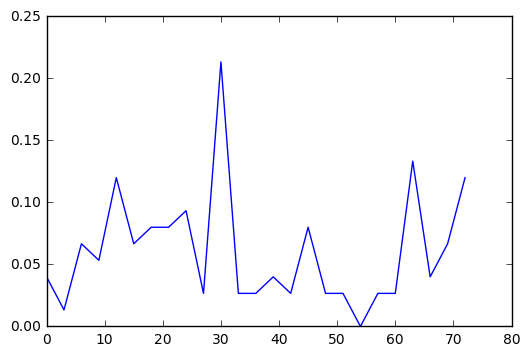

In [140]:
plt.plot(np.arange(0, len(X_train), 3), scores)

In [147]:
total = X_train.shape[0]
X_train_2 = np.copy(X_train)
n = 3
scores2 = []
for i in range(0, len(X_train), 3):
        X2 = scipy.sparse.coo_matrix(X_train_2[i:i+n])
        r = X2.row
        d = X2.data
        shp = X2.shape
        c = X2.col
        d2 = [np.sin(x) for x in d]
        c2 = [x+4 for x in c]
        r = np.append(r, r)
        c = np.append(c, c2)
        d = np.append(d, d2)
        X_train_2[i:i+n] = scipy.sparse.coo_matrix((d, (r, c)), shape=shp).toarray()

        c_range = np.array([0.001,0.1,1,10,100])
        classifier2 = GridSearchCV(LogisticRegression(), param_grid=dict(C=c_range))
        classifier2.fit(X_train_2, y_train)
        
        #print str(i)+ " Score: "+ str(classifier2.score(X_test_2, y_test)) + "\n"
        scores2.append(str(classifier2.score(X_test_2, y_test)))
  


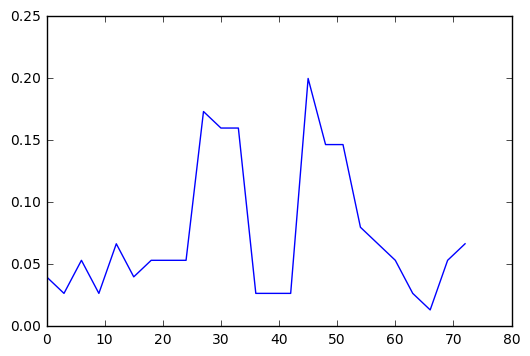

In [148]:
plt.plot(np.arange(0, len(X_train), 3), scores2)

In [151]:
iris = load_iris()
X, y = iris.data, iris.target

rng = np.random.RandomState(0)
permutation = rng.permutation(len(X))
X, y = X[permutation], y[permutation]
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.5)

X_test_2 = np.sin(X_test)
total = X_train.shape[0]
X_train_2 = np.copy(X_train)
y_train_2 = np.copy(y_train)
n = 3
scores3 = []
for i in range(0, len(X_train), 3):
        X2 = np.sin(X_train_2[i:i+n])
        X_train_2 = np.concatenate((X_train_2, X2), axis=0)
        y_train_2 = np.concatenate((y_train_2, y_train[i:i+n]), axis=0)

        c_range = np.array([0.001,0.1,1,10,100])
        classifier2 = GridSearchCV(LogisticRegression(), param_grid=dict(C=c_range))
        classifier2.fit(X_train_2, y_train_2)
        
        #print str(i)+ " Score: "+ str(classifier2.score(X_test_2, y_test)) + "\n"
        scores3.append(str(classifier2.score(X_test_2, y_test)))
  


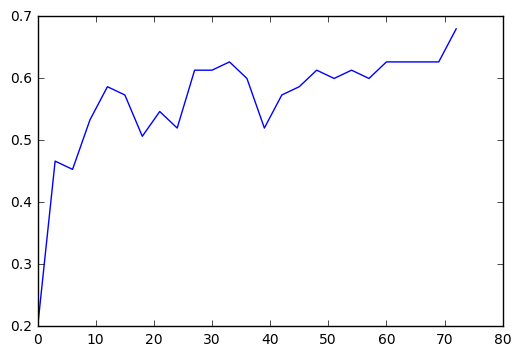

In [152]:
plt.plot(np.arange(0, len(X_train), 3), scores3)

In [177]:
f = open('icd.txt')
lines_list = f.read().split('\n')

ind = []
roc = []
score4 = []

for line in lines_list:
    words = line.split(" ")
    ind.append(words[2])
    roc.append(words[5])
    score4.append(words[7])

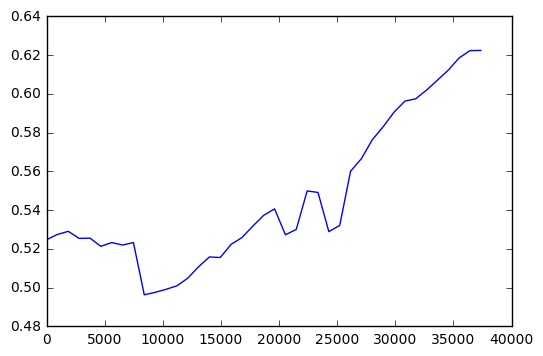

In [178]:
plt.plot(ind, score4)

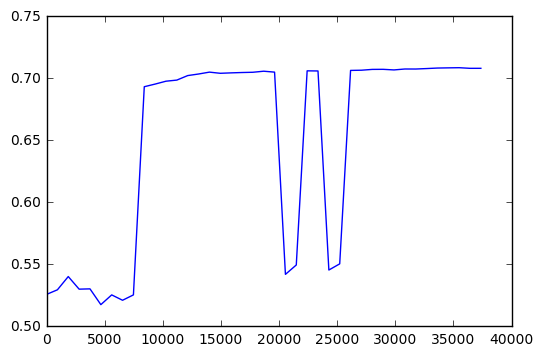

In [179]:
plt.plot(ind, roc)